## Arhus city council
- [Python version of analysis by Max Odsbjerg Pedersen](https://kulturarvscluster.kb.dk/arkiver/109)
- Word frequency analysis
- Visualization: bar plots wrapped by year

In [1]:
import pandas as pd

In [2]:
#meetings_1930_1940 = pd.read_csv("https://raw.githubusercontent.com/aarhusstadsarkiv/datasets/master/minutes/city-council/city-council-minutes-1930-1940.csv")
meetings_1930_1940 = pd.read_csv("../data/city-council-minutes-1930-1940.csv")

## Replace
- I. C. Jacobsen -> I.\_C._Jacobsen
- A. Hansen -> A.\_Hansen
- Chr. Jensen -> Chr.\_Jensen
- Vald. Pedersen -> Vald.\_Pedersen
- Dr. med. V. Genner -> Dr.\_med.\_V.\_Genner
- Alb. Olsen -> Alb.\_Olsen

In [3]:
regex = ['(^|\W)([A-z]){1,2}\. ([A-z]){1,3}\. ([A-z]){1,2}\. ([A-z-]{4,15})',
         '(^|\W)([A-z])\. ([A-z])\. ([A-z-]{3,15})',
         '(^|\W)([A-z])\. ([A-z-]{4,15})',
         '(^|\W)Chr\.\W([A-z]{4,15})',
         '(^|\W)Vald\. ([A-z]{4,15})',
         '(^|\W)Alb\. ([A-z]{4,15})',
         '(^|\W)Kai ([A-z]{4,15})',
         '(^|\W)Thomas ([A-z]{4,15})']

def remove_leading_underscore(s):
    if s[0] == '_':
        return ' ' + s[1:]
    return s

func = lambda m: print(m.group(0))
func_replace = lambda m: print(remove_leading_underscore(m.group(0).replace(' ', '_')))
#func_replace = lambda m: print(m.group(0).replace(' ', '_'))
raw = 'Thomas Christensen tog I. C. Jacobsen og H. C. Andersen fandt A. Hansen Chr. Jensen sammen med Vald. Pedersen og Dr. med. V. Genner samt E. Mejer Jacobsen og Alb. Olsen'
for reg in regex:
    pd.Series(raw).str.replace(reg, func)
for reg in regex:
    pd.Series(raw).str.replace(reg, func_replace)

 Dr. med. V. Genner
 I. C. Jacobsen
 H. C. Andersen
 C. Jacobsen
 C. Andersen
 A. Hansen
 V. Genner
 E. Mejer
 Chr. Jensen
 Vald. Pedersen
 Alb. Olsen
Thomas Christensen
 Dr._med._V._Genner
 I._C._Jacobsen
 H._C._Andersen
 C._Jacobsen
 C._Andersen
 A._Hansen
 V._Genner
 E._Mejer
 Chr._Jensen
 Vald._Pedersen
 Alb._Olsen
Thomas_Christensen


In [4]:
meetings_1930_1940.iloc[1]['text']

'Indstilling fra Skolekommission og Skoleudvalg angaaende Besættelse af Timelærer- og Timelærerindepladser. Følgende Indstilling forelaa: A. Timelærere. I. 1. A. Jacobsen, Aarhus. 2. C. M. Johannessen, do. 3. E. Mejer Jacobsen, do. II. 1. E. Mejer Jacobsen, do. 2. A. T. Nielsen, do. 3. G. Sørensen, do. III. 1. G. Sørensen, do. 2. C. M. Johannessen, do. 3. A. Jacobsen, do. B. Timelærerinder. I. 1. H. Nygaard, Aarhus. 2. H. Gransløv, do. 3. L. Dalgaard, do. II. 1. E. Buhl, do. 2. L. Dalgaard, do. 3. J. Jensen, do. III. 1. K. Larsen, do. 2. E. Buhl, do. 3. I. Bering, do.'

In [5]:
for reg in regex:
    meetings_1930_1940['text'] = meetings_1930_1940['text'].str.replace(reg, lambda m: remove_leading_underscore(m.group(0).replace(' ', '_')))

In [6]:
meetings_1930_1940.iloc[1]['text']

'Indstilling fra Skolekommission og Skoleudvalg angaaende Besættelse af Timelærer- og Timelærerindepladser. Følgende Indstilling forelaa: A._Timelærere. I. 1. A._Jacobsen, Aarhus. 2. C._M._Johannessen, do. 3. E._Mejer Jacobsen, do. II. 1. E._Mejer Jacobsen, do. 2. A._T._Nielsen, do. 3. G. Sørensen, do. III. 1. G. Sørensen, do. 2. C._M._Johannessen, do. 3. A._Jacobsen, do. B._Timelærerinder. I. 1. H._Nygaard, Aarhus. 2. H._Gransløv, do. 3. L._Dalgaard, do. II. 1. E._Buhl, do. 2. L._Dalgaard, do. 3. J._Jensen, do. III. 1. K._Larsen, do. 2. E._Buhl, do. 3. I._Bering, do.'

# Date string to pandas datatime

In [7]:
example = meetings_1930_1940.loc[234].date_of_meeting
[example, pd.to_datetime(example)]

['1930-06-19', Timestamp('1930-06-19 00:00:00')]

In [8]:
meetings_1930_1940['date_of_meeting'] = pd.to_datetime(meetings_1930_1940['date_of_meeting'])

# Each word as tidy data / long format
- not very elegang, but could not make pandas melt or wide_to_long function/methods working for me
- The next will likely take a few seconds

In [9]:
meetings_1930_1940.shape

(14508, 5)

In [10]:
rows = list()
for row in meetings_1930_1940.iterrows():
    r = row[1]
    try:
        for word in r[4].split(' '):
            rows.append((r[0].year, word))
    except:
        pass

In [11]:
meetings_1930_1940_long = pd.DataFrame(rows, columns=['year', 'word'])
meetings_1930_1940_long.shape

(1158175, 2)

In [12]:
meetings_1930_1940_long.head()

,year,word
0,1930,Mødet
1,1930,den
2,1930,3.
3,1930,April
4,1930,1930.


In [13]:
meetings_1930_1940_long['word'] = meetings_1930_1940_long['word'].str.lstrip(' ')
meetings_1930_1940_long['word'] = meetings_1930_1940_long['word'].str.rstrip(' ')
meetings_1930_1940_long['word'] = meetings_1930_1940_long['word'].str.lstrip('-')
meetings_1930_1940_long['word'] = meetings_1930_1940_long['word'].str.lstrip('(')
meetings_1930_1940_long['word'] = meetings_1930_1940_long['word'].str.rstrip('.')
meetings_1930_1940_long['word'] = meetings_1930_1940_long['word'].str.rstrip(')')
meetings_1930_1940_long['word'] = meetings_1930_1940_long['word'].str.rstrip(',')
meetings_1930_1940_long['word'] = meetings_1930_1940_long['word'].str.rstrip(';')
meetings_1930_1940_long['word'] = meetings_1930_1940_long['word'].str.lstrip('"')
meetings_1930_1940_long['word'] = meetings_1930_1940_long['word'].str.rstrip('"')
meetings_1930_1940_long['word'] = meetings_1930_1940_long['word'].str.lower()

In [14]:
meetings_1930_1940_long['word'].value_counts()

at                     38373
til                    29440
og                     26538
af                     25029
i                      23230
det                    20592
for                    17948
var                    15994
der                    15235
en                     14531
om                     13507
paa                    13116
fra                    12593
ikke                   12455
med                    11470
den                    11308
de                     10736
man                    10468
som                     8710
havde                   8068
kr                      7822
ved                     7103
men                     7028
kunde                   6941
et                      6110
vilde                   5856
aarhus                  5261
er                      5196
saa                     5016
1                       4175
                       ...  
retsforfølgning            1
29000,00                   1
i9000                      1
27/918746     

In [15]:
meetings_1930_1940_long.groupby('year')['word'].value_counts()

year  word             
1930  at                   2424
      til                  1953
      af                   1697
      og                   1606
      i                    1299
      det                  1276
      for                  1018
      var                   960
      en                    937
      der                   872
      om                    820
      paa                   798
      fra                   785
      ikke                  776
      den                   721
      med                   658
      de                    604
      man                   563
      kunde                 480
      ved                   450
      kr                    444
      men                   429
      havde                 419
      som                   405
      et                    382
      vilde                 361
      aarhus                315
      udvalget              309
      er                    302
      indstillingen         298
                

## Term frequency
- Count of each term $t$ per year $n(t)$, over number of words per year $N(y)$
- We then define the term frequency $\mbox{tf}(t)$ as
$$ \mbox{tf}(t) = \frac{n(t)}{N(y)} $$

In [16]:
word_tf_by_year = pd.DataFrame(meetings_1930_1940_long.groupby('year')['word'].value_counts(normalize=True))
word_tf_by_year.columns = ['tf']
word_tf_by_year['n'] = meetings_1930_1940_long.groupby('year')['word'].value_counts()
word_tf_by_year.loc[1930].sum() # tf should give 1.0. Sanity check

tf        1.0
n     71064.0
dtype: float64

## Inverse document frequency
- Penalize too common words small ('at', ...)
- Count the number of documents (in this case years) the term appears $v(t)$, over the total number of documents (years) $V$
- The inverse document frequency $\mbox{idf}$ is then
$$  \mbox{idf}(t) = \log \frac{V}{v(t)} = - \log \frac{v(t)}{V} $$

In [17]:
word_tf_by_year.reset_index(level=['year', 'word'], inplace=True)

In [18]:
word_tf_by_year

,year,word,tf,n
0,1930,at,0.034110,2424
1,1930,til,0.027482,1953
2,1930,af,0.023880,1697
3,1930,og,0.022599,1606
4,1930,i,0.018279,1299
5,1930,det,0.017956,1276
6,1930,for,0.014325,1018
7,1930,var,0.013509,960
8,1930,en,0.013185,937
9,1930,der,0.012271,872


In [19]:
import math

In [20]:
idf = list()
vt = word_tf_by_year['word'].sort_values().value_counts()
V = len(word_tf_by_year['year'].unique())

In [21]:
for word in word_tf_by_year['word']:
    idf.append(math.log(V/vt[word]))

In [22]:
words_statistics_by_year = word_tf_by_year
words_statistics_by_year['idf'] = idf

In [23]:
words_statistics_by_year.head()

,year,word,tf,n,idf
0,1930,at,0.034110,2424,0.0
1,1930,til,0.027482,1953,0.0
2,1930,af,0.023880,1697,0.0
3,1930,og,0.022599,1606,0.0
4,1930,i,0.018279,1299,0.0


In [24]:
words_statistics_by_year['tf_idf'] = words_statistics_by_year['tf']*words_statistics_by_year['idf']
words_statistics_by_year

,year,word,tf,n,idf,tf_idf
0,1930,at,0.034110,2424,0.000000,0.000000
1,1930,til,0.027482,1953,0.000000,0.000000
2,1930,af,0.023880,1697,0.000000,0.000000
3,1930,og,0.022599,1606,0.000000,0.000000
4,1930,i,0.018279,1299,0.000000,0.000000
5,1930,det,0.017956,1276,0.000000,0.000000
6,1930,for,0.014325,1018,0.000000,0.000000
7,1930,var,0.013509,960,0.000000,0.000000
8,1930,en,0.013185,937,0.000000,0.000000
9,1930,der,0.012271,872,0.000000,0.000000


In [25]:
# select top_n tf_idf by year
top_n = 15
words_idf_top_by_year = words_statistics_by_year.groupby('year').apply(lambda grp:  grp.nlargest(top_n, 'tf_idf'))
words_idf_top_by_year

year                   word        tf    n       idf    tf_idf
year                                                                       
1930 572     1930           schack-eyber  0.000225   16  2.397895  0.000540
     233     1930                1929-30  0.000521   37  0.788457  0.000411
     225     1930          holst-knudsen  0.000535   38  0.606136  0.000324
     301     1930          j._perregaard  0.000408   29  0.788457  0.000322
     726     1930              børnemælk  0.000169   12  1.704748  0.000288
     471     1930           bankdirektør  0.000267   19  1.011601  0.000270
     983     1930     koncessionshaverne  0.000127    9  1.704748  0.000216
     1389    1930  gasforsynings-selskab  0.000084    6  2.397895  0.000202
     57      1930                   1930  0.002040  145  0.095310  0.000194
     1063    1930                bivogne  0.000113    8  1.704748  0.000192
     1138    1930          privatbankens  0.000113    8  1.704748  0.000192
     671     1930                    30-  0.000183   13  1.011601  0.000185
     747     1930              kioskerne  0.000169   12  1.011601  0.000171
     1758    1930        skibsafgifterne  0.000070    5  2.397895  0.000169
     1201    1930  børnemælksforsyningen  0.000099    7  1.704748  0.000168
1931 10061   1931               hjemløse  0.000165   19  2.397895  0.000396
     9588    1931          j._perregaard  0.000460   53  0.788457  0.000363
     10192   1931                    etg  0.000139   16  2.397895  0.000333
     9579    1931          holst-knudsen  0.000469   54  0.606136  0.000284
     10117   1931                 tarnac  0.000156   18  1.704748  0.000267
     9722    1931                1930-31  0.000313   36  0.788457  0.000247
     10749   1931       fornyelsesfondet  0.000078    9  2.397895  0.000187
     10848   1931                    504  0.000069    8  2.397895  0.000167
     10873   1931                  bitch  0.000069    8  2.397895  0.000167
     10986   1931      svagbørnskolonier  0.000069    8  2.397895  0.000167
     10081   1931                    50-  0.000156   18  1.011601  0.000158
     9587    1931           hjælpekassen  0.000460   53  0.318454  0.000147
     9488    1931               leonhard  0.000730   84  0.200671  0.000146
     11154   1931               raatjære  0.000061    7  2.397895  0.000146
     9884    1931          hjælpekassens  0.000226   26  0.606136  0.000137
...           ...                    ...       ...  ...       ...       ...
1939 113310  1939     thomas_christensen  0.000766   92  1.011601  0.000775
     113592  1939                     ø.  0.000291   35  1.704748  0.000497
     113793  1939                 genner  0.000200   24  2.397895  0.000479
     113249  1939                   1939  0.001257  151  0.318454  0.000400
     113999  1939                lomholt  0.000150   18  2.397895  0.000359
     113279  1939         socialudvalget  0.000957  115  0.318454  0.000305
     113579  1939                1938-39  0.000291   35  1.011601  0.000295
     113410  1939                   1938  0.000466   56  0.606136  0.000283
     113602  1939                1939-40  0.000275   33  1.011601  0.000278
     114256  1939        børneafdelingen  0.000108   13  2.397895  0.000259
     113987  1939                   forh  0.000150   18  1.704748  0.000255
     113836  1939       stadsarchitekten  0.000191   23  1.299283  0.000249
     114070  1939      økonomidirektøren  0.000141   17  1.704748  0.000241
     114171  1939          væddeløbsbane  0.000125   15  1.704748  0.000213
     113512  1939            kai_blicher  0.000350   42  0.606136  0.000212
1940 126761  1940     thomas_christensen  0.000957   34  1.011601  0.000968
     126880  1940                1940-41  0.000507   18  1.704748  0.000864
     126883  1940           flyvepladsen  0.000507   18  1.704748  0.000864
     126918  1940          eksercerplads  0.000450   16  1.704748  0.000768
     127099  1940          stadsdyrlægen  0.000281   10  2.39

In [26]:
words_idf_top_by_year.drop(labels=['year'], inplace=True, axis=1)
words_idf_top_by_year.reset_index(level='year', inplace=True)
words_idf_top_by_year


,year,word,tf,n,idf,tf_idf
572,1930,schack-eyber,0.000225,16,2.397895,0.000540
233,1930,1929-30,0.000521,37,0.788457,0.000411
225,1930,holst-knudsen,0.000535,38,0.606136,0.000324
301,1930,j._perregaard,0.000408,29,0.788457,0.000322
726,1930,børnemælk,0.000169,12,1.704748,0.000288
471,1930,bankdirektør,0.000267,19,1.011601,0.000270
983,1930,koncessionshaverne,0.000127,9,1.704748,0.000216
1389,1930,gasforsynings-selskab,0.000084,6,2.397895,0.000202
57,1930,1930,0.002040,145,0.095310,0.000194
1063,1930,bivogne,0.000113,8,1.704748,0.000192


In [27]:
words_idf_top_by_year.to_csv('../data/aarhus_city_council_top15_tf_idf.csv')

## Visualization as bar plots

In [28]:
# conda install -c conda-forge plotnin+e
import plotnine as pn
%matplotlib inline

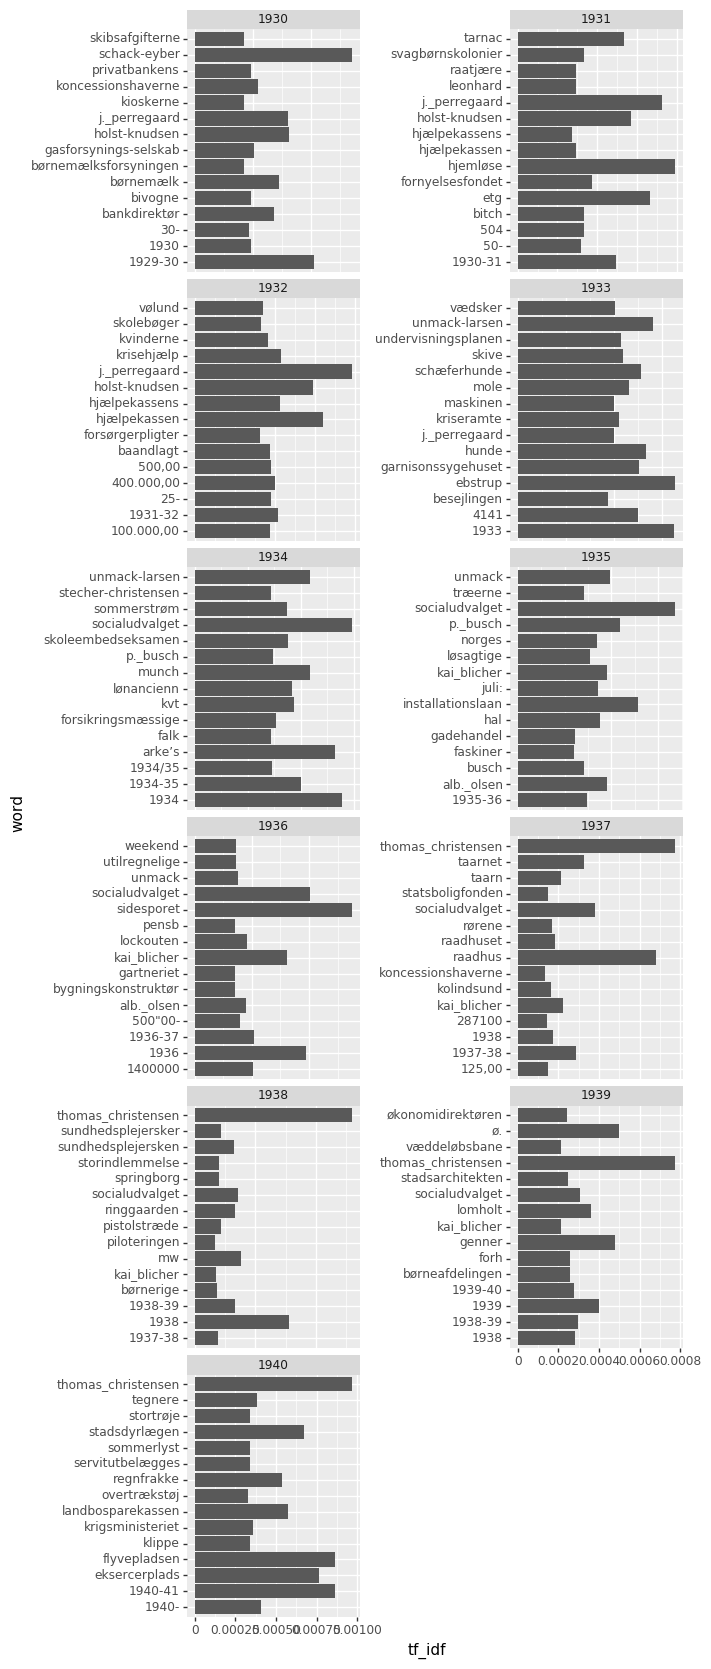

<ggplot: (-9223363286590998468)>

In [29]:
%matplotlib inline
(pn.ggplot(words_idf_top_by_year) +
  pn.aes(x='word', y='tf_idf') +
  pn.geom_col() + 
  pn.coord_flip() +
  pn.facet_wrap('year', ncol=2, scales='free_y')+
  pn.theme(panel_spacing_x=1.5, aspect_ratio=1.4)
  )

## Ordered data
- Visually more easy to interpret - not as overwheliming
- Dont know how to do this with facets
- A non-facet solution is to [order categorical](https://plotnine.readthedocs.io/en/stable/tutorials/miscellaneous-order-plot-series.html)
- But we have words (categorical) in multiple facets but not with same order
- A solution: monkey patch

In [30]:
old_map = pn.scales.scale_xy.scale_position_discrete.map

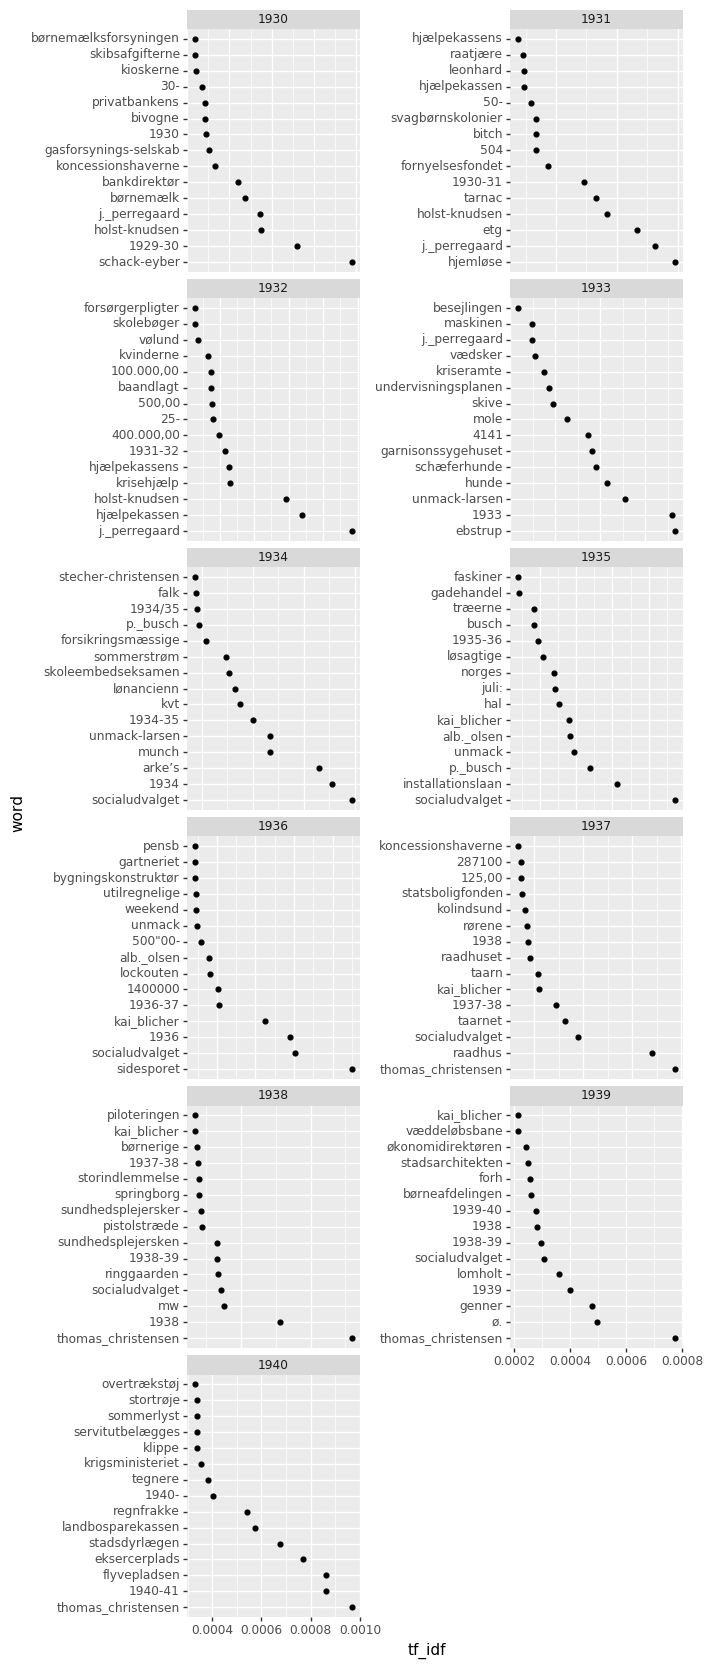

<ggplot: (-9223363286591426104)>

In [31]:
import numpy as np

def cmap(self, series, limits=None): 
    if limits is None:
        if isinstance(series.tolist()[0], str):
            self.limits = series.tolist()
        limits = self.limits
    if pn.utils.array_kind.discrete(series):
        seq = np.arange(1, len(limits)+1)
        return seq[pn.utils.match(series, limits)]
    return series

pn.scales.scale_xy.scale_position_discrete.map = cmap

(pn.ggplot(words_idf_top_by_year) +
  pn.aes(x='word', y='tf_idf') +
  pn.geom_point() + pn.coord_flip() +
  pn.facet_wrap('year', ncol=2, scales='free_y')+
  pn.theme(panel_spacing_x=1.5, aspect_ratio=1.4)
  )

In [32]:
pn.scales.scale_xy.scale_position_discrete.map = old_map # restore

In [33]:
words_idf_top_by_year.set_index('year',inplace=True)

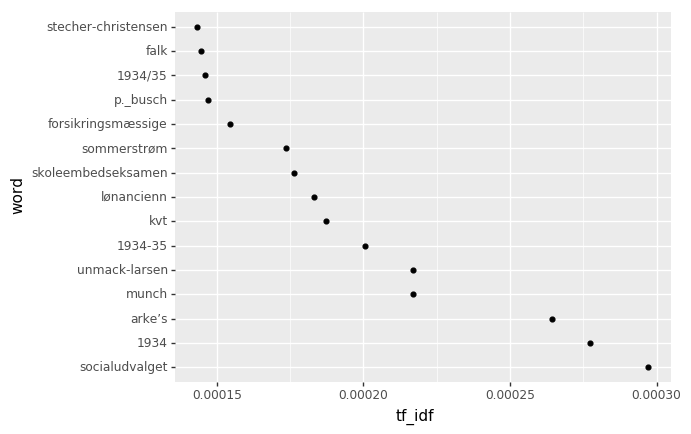

<ggplot: (-9223363286591391751)>

In [34]:
year = 1934
(pn.ggplot(words_idf_top_by_year.loc[year]) +
  pn.aes(x='word', y='tf_idf') +
  pn.scales.scale_x_discrete(limits=list(words_idf_top_by_year.loc[year]['word'])) + 
  pn.geom_point() + pn.coord_flip() 
  )

In [35]:
# Word examples from occurance 
word = 'rørene'
oc = 10
ind = meetings_1930_1940_long['word'][meetings_1930_1940_long['word'] == word]
meetings_1930_1940_long['word'].loc[ind.index[oc]-10:ind.index[oc]+10]

832508          skulde
832509             saa
832510            selv
832511           eller
832512          gennem
832513              en
832514     entreprenør
832515        overtage
832516    nedlægningen
832517              af
832518          rørene
832519             man
832520           havde
832521        forlangt
832522               4
832523               %
832524           rabat
832525              af
832526         firmaet
832527             men
832528             det
Name: word, dtype: object

## Examples for a single year

In [36]:
year = 1938

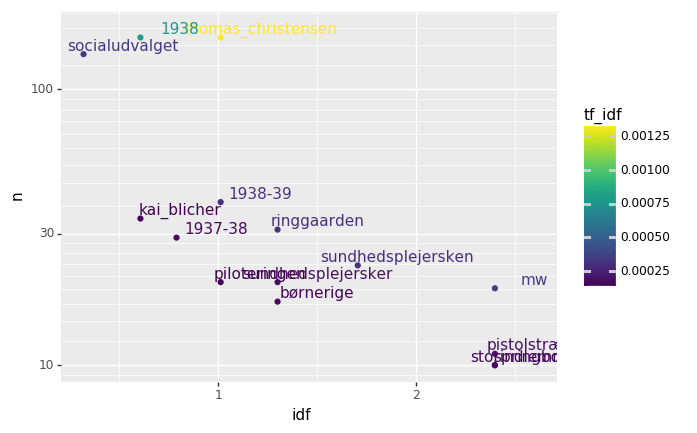

<ggplot: (8750257137451)>

In [38]:
(pn.ggplot(words_idf_top_by_year.loc[year]) +
  pn.aes(x='idf', y='n', label='word', color='tf_idf') +
  pn.geom_point() + 
  pn.geom_text(nudge_x=0.2, nudge_y=0.03) +
  pn.scales.scale_y_log10()
  )

In [39]:
words_idf_top_by_year.loc[year]

,word,tf,n,idf,tf_idf
year,,,,,
1938,thomas_christensen,0.001282,154,1.011601,0.001297
1938,1938,0.001282,154,0.606136,0.000777
1938,mw,0.000158,19,2.397895,0.000379
1938,socialudvalget,0.001116,134,0.318454,0.000355
1938,ringgaarden,0.000258,31,1.299283,0.000335
1938,1938-39,0.000325,39,1.011601,0.000328
1938,sundhedsplejersken,0.000191,23,1.704748,0.000326
1938,pistolstræde,0.000092,11,2.397895,0.000220
1938,sundhedsplejersker,0.000167,20,1.299283,0.000216


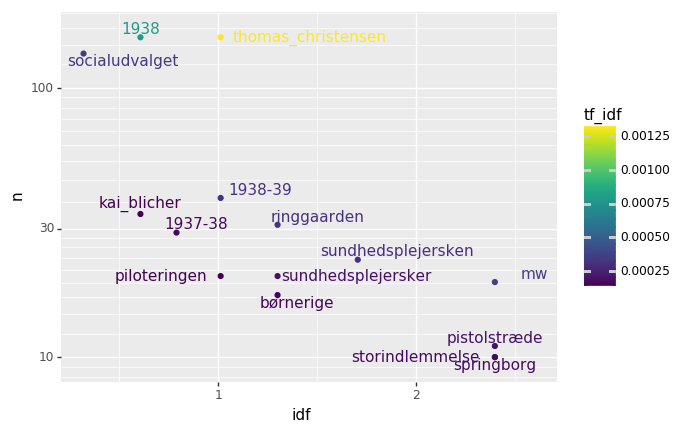

<ggplot: (8750257104448)>

In [40]:
# Manuel nodge
delta_x = [0.45,  0, 0.2 , 0.2  ,  0.2,  0.2,  0.2,    0, 0.4,    0, -0.4,  0.1,  0.1,   0, -0.3]
delta_y = [0, 0.03, 0.03, -0.03, 0.03, 0.03, 0.03, 0.03, 0  ,-0.03, 0   , 0.03,-0.03,0.04, 0]

(pn.ggplot(words_idf_top_by_year.loc[year]) +
  pn.aes(x='idf', y='n', label='word', color='tf_idf') +
  pn.geom_point() + 
  pn.geom_text(nudge_x=delta_x, nudge_y=delta_y) +
  pn.scales.scale_y_log10()
  )

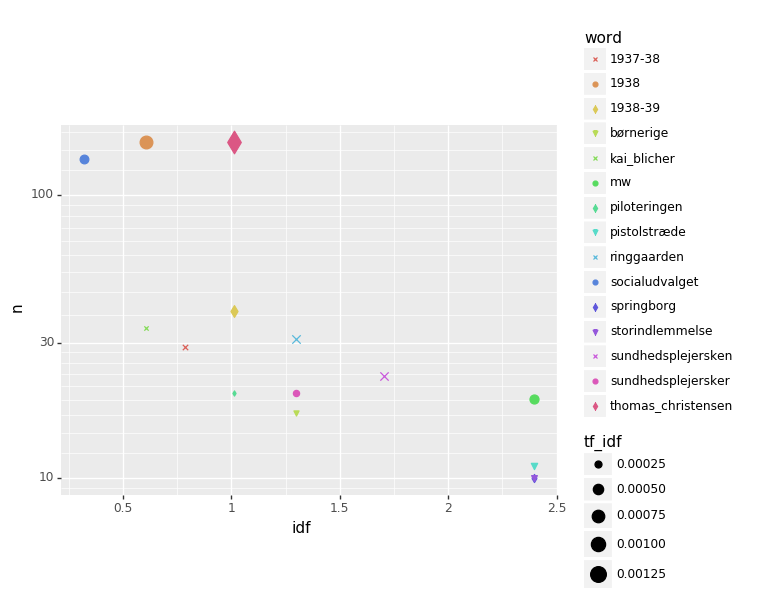

<ggplot: (-9223363286592893794)>

In [41]:
(pn.ggplot(words_idf_top_by_year.loc[year])
  + pn.aes(x='idf', y='n', color='word', size='tf_idf', shape='word')
  + pn.scales.scale_shape_manual(values=['x', 'o', 'd', 'v','x', 'o', 'd', 'v','x', 'o', 'd', 'v','x', 'o', 'd', 'v'])
  + pn.geom_point()
  + pn.scales.scale_y_log10()
  )